In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sales-dataset/sales_data.csv


## Sales Dataset

- Problem statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing

### 1)Problem Statement
- The dataset contains information that simulates sales transactions across different products, regions, and customers. Each row represents an individual sale event with various details associated with it.

### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/vinothkannaece/sales-dataset/data
- The data consists of 14 columns and 1000 rows.

In [2]:
df = pd.read_csv('/kaggle/input/sales-dataset/sales_data.csv')

In [3]:
df.head()

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep
0,1052,2023-02-03,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob
1,1093,2023-04-21,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob
2,1015,2023-09-21,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,South-David
3,1072,2023-08-24,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,Retail,South-Bob
4,1061,2023-03-24,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,Online,East-Charlie


In [4]:
df.isna().sum()

Product_ID              0
Sale_Date               0
Sales_Rep               0
Region                  0
Sales_Amount            0
Quantity_Sold           0
Product_Category        0
Unit_Cost               0
Unit_Price              0
Customer_Type           0
Discount                0
Payment_Method          0
Sales_Channel           0
Region_and_Sales_Rep    0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Product_ID            1000 non-null   int64  
 1   Sale_Date             1000 non-null   object 
 2   Sales_Rep             1000 non-null   object 
 3   Region                1000 non-null   object 
 4   Sales_Amount          1000 non-null   float64
 5   Quantity_Sold         1000 non-null   int64  
 6   Product_Category      1000 non-null   object 
 7   Unit_Cost             1000 non-null   float64
 8   Unit_Price            1000 non-null   float64
 9   Customer_Type         1000 non-null   object 
 10  Discount              1000 non-null   float64
 11  Payment_Method        1000 non-null   object 
 12  Sales_Channel         1000 non-null   object 
 13  Region_and_Sales_Rep  1000 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 109.5+ KB


In [7]:
df.nunique()

Product_ID               100
Sale_Date                340
Sales_Rep                  5
Region                     4
Sales_Amount             998
Quantity_Sold             49
Product_Category           4
Unit_Cost                998
Unit_Price              1000
Customer_Type              2
Discount                  31
Payment_Method             3
Sales_Channel              2
Region_and_Sales_Rep      20
dtype: int64

In [8]:
df.describe()

,Product_ID,Sales_Amount,Quantity_Sold,Unit_Cost,Unit_Price,Discount
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,1050.128000,5019.265230,25.355000,2475.304550,2728.440120,0.15239
std,29.573505,2846.790126,14.159006,1417.872546,1419.399839,0.08720
min,1001.000000,100.120000,1.000000,60.280000,167.120000,0.00000
25%,1024.000000,2550.297500,13.000000,1238.380000,1509.085000,0.08000
50%,1051.000000,5019.300000,25.000000,2467.235000,2696.400000,0.15000
75%,1075.000000,7507.445000,38.000000,3702.865000,3957.970000,0.23000
max,1100.000000,9989.040000,49.000000,4995.300000,5442.150000,0.30000


In [9]:
print("Categories in 'region' variable:     ",end=" " )
print(df['Region'].unique())

print("Categories in 'Product_Category' variable:     ",end=" " )
print(df['Product_Category'].unique())

print("Categories in 'Customer_Type' variable:     ",end=" " )
print(df['Customer_Type'].unique())

print("Categories in 'Payment_Method' variable:     ",end=" " )
print(df['Payment_Method'].unique())

print("Categories in 'Sales_Channel' variable:     ",end=" " )
print(df['Sales_Channel'].unique())

Categories in 'region' variable:      ['North' 'West' 'South' 'East']
Categories in 'Product_Category' variable:      ['Furniture' 'Food' 'Clothing' 'Electronics']
Categories in 'Customer_Type' variable:      ['Returning' 'New']
Categories in 'Payment_Method' variable:      ['Cash' 'Bank Transfer' 'Credit Card']
Categories in 'Sales_Channel' variable:      ['Online' 'Retail']


In [10]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 6 numerical features : ['Product_ID', 'Sales_Amount', 'Quantity_Sold', 'Unit_Cost', 'Unit_Price', 'Discount']

We have 8 categorical features : ['Sale_Date', 'Sales_Rep', 'Region', 'Product_Category', 'Customer_Type', 'Payment_Method', 'Sales_Channel', 'Region_and_Sales_Rep']


In [11]:
df.head()

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep
0,1052,2023-02-03,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob
1,1093,2023-04-21,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob
2,1015,2023-09-21,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,South-David
3,1072,2023-08-24,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,Retail,South-Bob
4,1061,2023-03-24,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,Online,East-Charlie


In [12]:
print(df["Sales_Rep"].value_counts())
print('-'* 10)
print(df["Region"].value_counts())
print('-'* 10)
print(df["Region_and_Sales_Rep"].value_counts())
print('-'* 10)
print(df["Region_and_Sales_Rep"].unique())


Sales_Rep
David      222
Eve        209
Bob        208
Alice      192
Charlie    169
Name: count, dtype: int64
----------
Region
North    267
East     263
West     244
South    226
Name: count, dtype: int64
----------
Region_and_Sales_Rep
North-Eve        64
East-Bob         60
East-David       59
South-David      56
North-David      56
North-Charlie    55
East-Eve         55
West-Bob         54
East-Alice       52
West-David       51
South-Bob        50
North-Alice      48
West-Alice       47
West-Eve         47
West-Charlie     45
South-Alice      45
North-Bob        44
South-Eve        43
East-Charlie     37
South-Charlie    32
Name: count, dtype: int64
----------
['North-Bob' 'West-Bob' 'South-David' 'South-Bob' 'East-Charlie'
 'West-Charlie' 'South-Eve' 'North-Eve' 'West-Eve' 'South-Alice'
 'South-Charlie' 'North-David' 'East-Bob' 'West-David' 'East-Eve'
 'North-Alice' 'East-David' 'West-Alice' 'East-Alice' 'North-Charlie']


In [13]:
df.groupby('Sales_Rep')['Sales_Amount'].sum().sort_values(ascending=False)

Sales_Rep
David      1141737.36
Bob        1080990.63
Eve         970183.99
Alice       965541.77
Charlie     860811.48
Name: Sales_Amount, dtype: float64

In [14]:
df.groupby('Region')['Sales_Amount'].sum().sort_values(ascending=False)

Region
North    1369612.51
East     1259792.93
West     1235608.93
South    1154250.86
Name: Sales_Amount, dtype: float64

#### Information from above
- David is the seller who sold most products
- North is the region that sold most products
- Eve is the seller who sold most products in North  

In [15]:
df.head()

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep
0,1052,2023-02-03,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob
1,1093,2023-04-21,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob
2,1015,2023-09-21,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,South-David
3,1072,2023-08-24,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,Retail,South-Bob
4,1061,2023-03-24,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,Online,East-Charlie


In [16]:
df["Product_Category"].value_counts()

Product_Category
Clothing       268
Furniture      260
Electronics    246
Food           226
Name: count, dtype: int64

In [17]:
df.head()

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep
0,1052,2023-02-03,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob
1,1093,2023-04-21,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob
2,1015,2023-09-21,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,South-David
3,1072,2023-08-24,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,Retail,South-Bob
4,1061,2023-03-24,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,Online,East-Charlie


In [18]:
df.groupby('Product_Category')['Quantity_Sold'].sum().sort_values(ascending=False)

Product_Category
Clothing       6922
Furniture      6729
Electronics    6096
Food           5608
Name: Quantity_Sold, dtype: int64

- Cloth is the product that have most sales

In [19]:
df.groupby('Customer_Type')['Quantity_Sold'].sum().sort_values(ascending=False)

Customer_Type
New          13184
Returning    12171
Name: Quantity_Sold, dtype: int64

In [20]:
df.groupby('Payment_Method')['Quantity_Sold'].sum().sort_values(ascending=False)

Payment_Method
Bank Transfer    8696
Credit Card      8441
Cash             8218
Name: Quantity_Sold, dtype: int64

In [21]:
df.groupby('Sales_Channel')['Quantity_Sold'].sum().sort_values(ascending=False)

Sales_Channel
Retail    12753
Online    12602
Name: Quantity_Sold, dtype: int64

In [22]:
df.groupby('Product_Category')['Discount'].sum().sort_values(ascending=False)

Product_Category
Clothing       42.94
Furniture      41.11
Food           34.76
Electronics    33.58
Name: Discount, dtype: float64

In [23]:
df[['Unit_Price', 'Unit_Cost']].describe()

,Unit_Price,Unit_Cost
count,1000.000000,1000.000000
mean,2728.440120,2475.304550
std,1419.399839,1417.872546
min,167.120000,60.280000
25%,1509.085000,1238.380000
50%,2696.400000,2467.235000
75%,3957.970000,3702.865000
max,5442.150000,4995.300000


In [24]:
df['Profit_Per_Unit'] = df['Unit_Price'] - df['Unit_Cost']

In [25]:
df[['Unit_Price', 'Unit_Cost', 'Profit_Per_Unit']]

,Unit_Price,Unit_Cost,Profit_Per_Unit
0,267.22,152.75,114.47
1,4209.44,3816.39,393.05
2,371.40,261.56,109.84
3,4467.75,4330.03,137.72
4,692.71,637.37,55.34
...,...,...,...
995,5442.15,4943.03,499.12
996,1856.40,1754.32,102.08
997,438.27,355.72,82.55
998,3743.39,3685.03,58.36


In [26]:
df[['Unit_Price', 'Unit_Cost', 'Profit_Per_Unit']].describe()

,Unit_Price,Unit_Cost,Profit_Per_Unit
count,1000.000000,1000.000000,1000.000000
mean,2728.440120,2475.304550,253.135570
std,1419.399839,1417.872546,141.081466
min,167.120000,60.280000,10.310000
25%,1509.085000,1238.380000,133.647500
50%,2696.400000,2467.235000,256.525000
75%,3957.970000,3702.865000,367.607500
max,5442.150000,4995.300000,499.930000


- The sales have a profit mean of 253,13

In [27]:
df.head(2)

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep,Profit_Per_Unit
0,1052,2023-02-03,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob,114.47
1,1093,2023-04-21,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob,393.05


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
import warnings
warnings.filterwarnings('ignore')

Text(0.5, 1.0, 'Sales Distribution by Representative and Region')

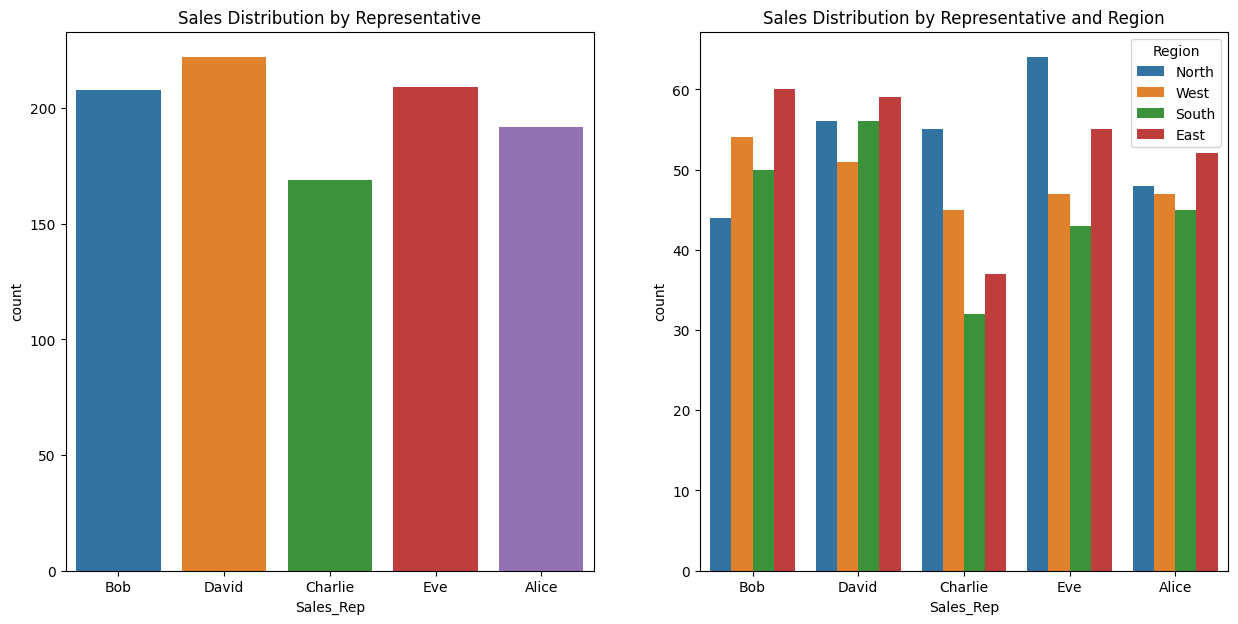

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.countplot(data=df, x='Sales_Rep', ax=axs[0])
axs[0].set_title("Sales Distribution by Representative")

sns.countplot(data=df, x='Sales_Rep', hue='Region', ax=axs[1])
axs[1].set_title("Sales Distribution by Representative and Region")

<Axes: xlabel='Sale_Date'>

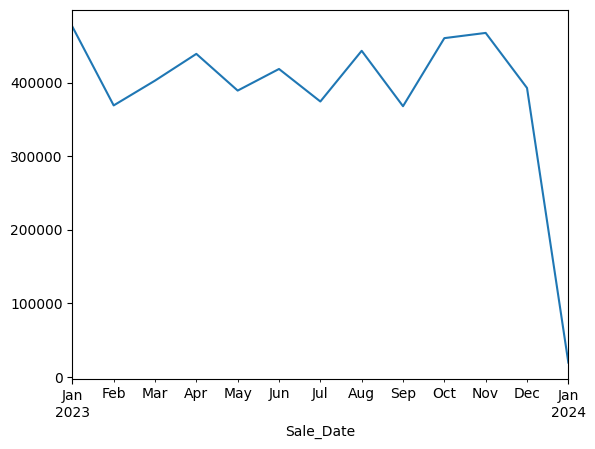

In [31]:
#Sales Amount per Date
df['Sale_Date'] = pd.to_datetime(df['Sale_Date'])
df.set_index('Sale_Date').resample('M')['Sales_Amount'].sum().plot()

<Axes: >

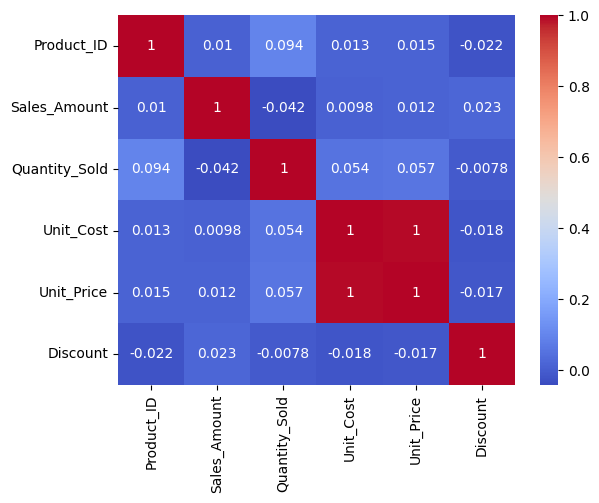

In [32]:
sns.heatmap(df[numeric_features].corr(), annot=True, cmap="coolwarm")